# Chose 3 different classification techniques

## Read data
Only `learn` file relevant for training:
`data/amazon/amazon_review_ID.shuf.lrn.csv`

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [29]:
import math
def plot_parameter_analysis(grid, params, param1, param2, params_base, method_name, function_name="accuracy", dataset_name="amazon"):
    scores_df = pd.DataFrame(grid.cv_results_)
    
    #print('params:', params.keys())
    grid_shape = [len(params[param]) for param in params.keys()] 
    scores_mean = [x for x in scores_df['mean_test_score']]
    scores_mean = np.array(scores_mean).reshape(grid_shape)
    scores_std = [x for x in scores_df['std_test_score']]
    scores_std = np.array(scores_std).reshape(grid_shape)
    
    #print('param1', param1)
    #print('param2', param2)
    print('init', scores_mean.shape)#, scores_mean)
    for ind, param in enumerate(params.keys()):
        if param is not param1 and param is not param2:
            #print('param', ind,':', param)
            #print('before', scores_mean.shape)#, scores_mean)
            delete_arr = np.array(range(len(params[param])))
            #print ('delete_array', delete_arr)
            delete_arr = delete_arr[[((params[param][p] is not params_base[param][0]) 
                                      if not isinstance(params_base[param][0], float) 
                                         and not isinstance(params[param][p], float)
                                      else math.isclose(params[param][p], params_base[param][0]))
                                     for p in range(len(params[param]))]]
        
            #print ('delete_array', delete_arr)
            scores_mean = np.delete(scores_mean, delete_arr, axis=ind)
            scores_std = np.delete(scores_std, delete_arr, axis=ind)
            #print('after', scores_mean.shape)#, scores_mean)
    scores_mean = np.squeeze(scores_mean)
    scores_std = np.squeeze(scores_std)
    #print('final score shape', scores_mean.shape, scores_mean)
    
    plt.figure(figsize=(20, 20))
    for ind, i in enumerate(params[param2]):
        if list(params.keys()).index(param1) < list(params.keys()).index(param2):
            plt.plot(params[param1], scores_mean[:,ind], label=param2+': ' + str(i))
            plt.plot(params[param1], scores_mean[:,ind] + scores_std[:,ind], color='black', alpha=0.3)
            plt.plot(params[param1], scores_mean[:,ind] - scores_std[:,ind], color='black', alpha=0.3)
        else:
            plt.plot(params[param1], scores_mean[ind], label=param2+': ' + str(i))
            plt.plot(params[param1], scores_mean[ind] + scores_std[ind], color='black', alpha=0.3)
            plt.plot(params[param1], scores_mean[ind] - scores_std[ind], color='black', alpha=0.3)
    plt.legend()
    plt.xlabel(param1)
    plt.ylabel('Mean score (' + function_name + ')')
    plt.title('Parameter analysis for ' + method_name + "\n" + dataset_name)
    plt.savefig('logreg_amazon.png')
    plt.show()


In [5]:
amazon = pd.read_csv('data/amazon/amazon_review_ID.shuf.lrn.csv')

### Check data
`info()` method shows if there are missing values
it shows that there aren't any missing values (non-null for every feature)

In [5]:

amazon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10002 entries, ID to Class
dtypes: int64(10001), object(1)
memory usage: 57.2+ MB


In [6]:
print(amazon['Class'].unique())

['Chell' 'Engineer' 'Grove' 'Davisson' 'Wilson' 'Brody' 'Lovitt' 'Vision'
 'Morrison' 'Nigam' 'Johnson' 'Koenig' 'Mitchell' 'Ashbacher' 'McKee'
 'Robert' 'Calvinnme' 'Goonan' 'Peterson' 'Vernon' 'Merritt' 'Riley'
 'Walters' 'Agresti' 'Lee' 'Kolln' 'Lawyeraau' 'Shea' 'Power' 'Chachra'
 'Harp' 'Chandler' 'Auken' 'Neal' 'Mark' 'Cholette' 'Blankenship' 'Janson'
 'Hayes' 'Taylor' 'Sherwin' 'Bukowsky' 'Corn' 'Dent' 'Messick'
 'Mahlers2nd' 'CFH' 'Cutey' 'Comdet' 'Brown']


### Having a look at the Class column
Seems to be not too unbalanced so try out only using a labelEncoder



(array([77., 74., 70., 76., 81., 78., 78., 80., 69., 67.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

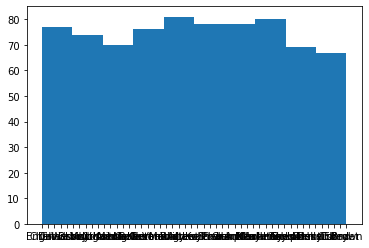

In [9]:
plt.hist(amazon['Class'])


In [8]:
from sklearn.preprocessing import LabelEncoder


In [10]:
encoder = LabelEncoder()
encoder.fit(amazon['Class'])

amazon['Class'] = encoder.transform(amazon['Class'])

## Creating train and test data 
Using a stratified approach to ensure all the classes are in the training data.

In [11]:
X = amazon.drop('Class', axis = 1).values
y = amazon['Class'].values


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)


## Starting with a simple model to:
+ get a sense of how challenging the problem is
+ many more things might go wrong with complex models
+ how much signal can we pull out using basic models

## Logistic Regression
__Score history:__  

|description | accuracy | marco avg | weighted avg |
|------------| -------- | --------- | ------------ |
| first try | 0.55 | 0.56, 0.54, 0.53 | 0.57, 0.55, 0.54 |
| with robustScaler | 0.64 | 0.70, 0.63, 0.63 | 0.68, 0.64, 0.62 |
| - | - | - | - |


### Logistic Regression parameters
TODO

In [13]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix  

In [14]:
pipe_logreg = Pipeline([
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression())
])

In [22]:
# create parameter list for ridge regression
params_logreg = {
    'logreg__C':[0.5, 0.6, 0.7, 1.1],
    'logreg__class_weight': [None, 'balanced']
}

In [23]:
# setup cross validation parameter grid search
grid_logreg = GridSearchCV(estimator=pipe_logreg,
    param_grid=params_logreg,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1)

In [24]:
# fitting model on training data
grid_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:   55.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   55.8s finished
C:\Users\rapha\Anaconda3\envs\DatasetDescription\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rapha\Anaconda3\envs\DatasetDescription\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rapha\Anaconda3\envs\DatasetDescription\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_rati

In [26]:
# extracting best parameters (can be used for finer hyper parameter tuning)
grid_logreg.best_params_

{'logreg__C': 0.5, 'logreg__class_weight': None}

In [19]:
grid_logreg.score(X_test, y_test) 


0.6241966519510379

In [38]:
y_pred = grid_logreg.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.50      0.60      0.55         5
           2       0.50      0.80      0.62         5
           3       1.00      0.50      0.67         4
           4       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.60      0.75      0.67         4
           7       1.00      0.50      0.67         2
           8       1.00      0.20      0.33         5
           9       0.67      1.00      0.80         6
          10       0.80      1.00      0.89         4
          11       0.46      1.00      0.63         6
          12       1.00      0.40      0.57         5
          13       0.33      0.20      0.25         5
          14       1.00      0.75      0.86         4
          15       1.00      1.00      1.00         5
          16       0.50      0.60      0.55         5
          17       1.00    

In [33]:
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


init (4, 2)


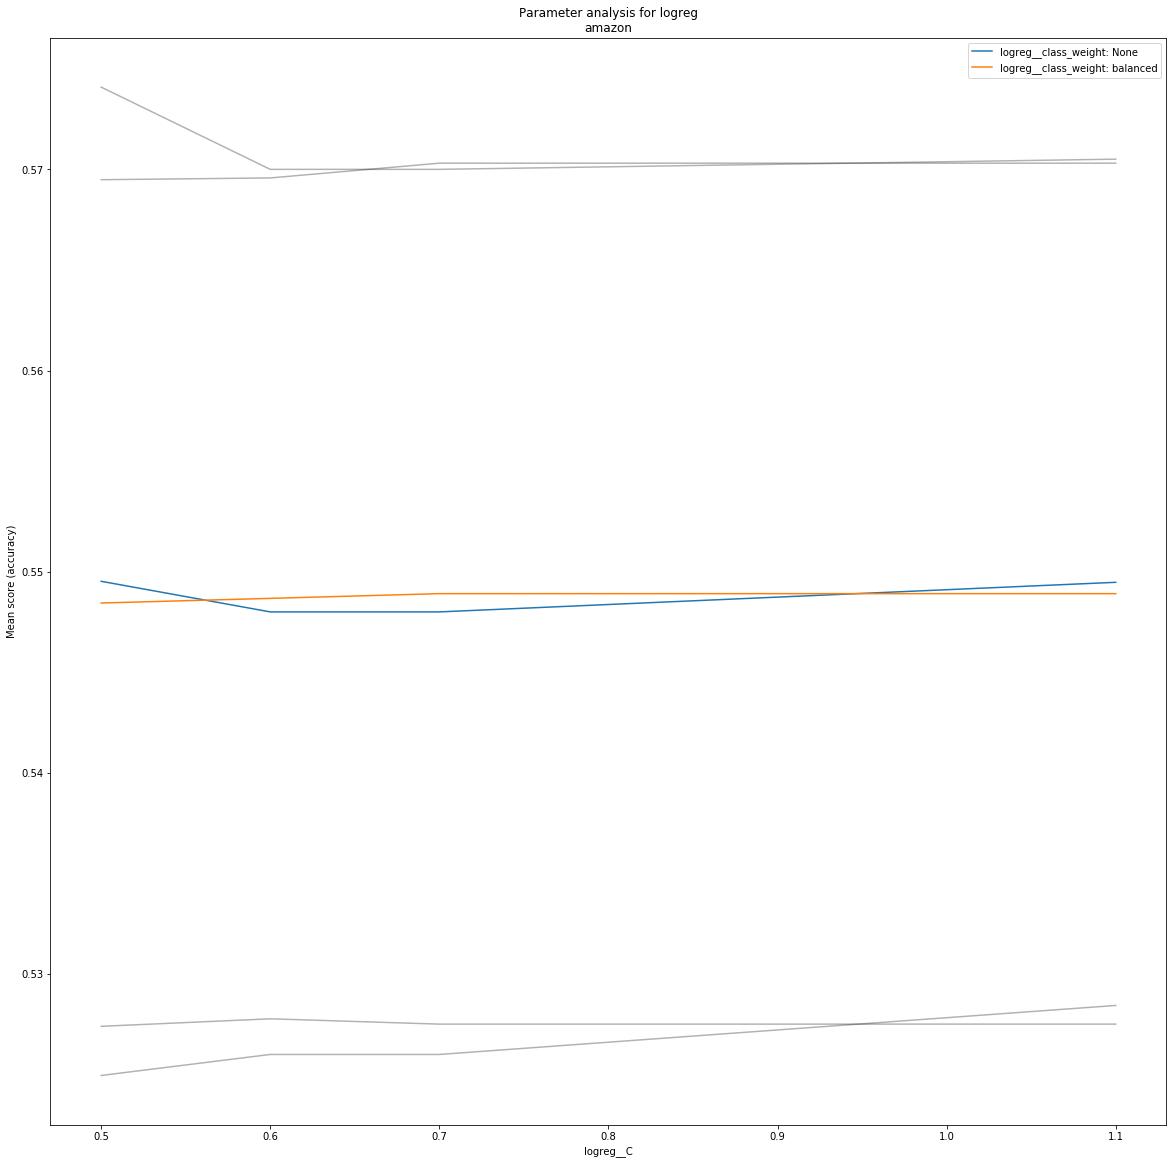

In [30]:
params_logreg_base = {}
plot_parameter_analysis(grid=grid_logreg, params=params_logreg, param1='logreg__C', 
                        param2='logreg__class_weight', params_base=params_logreg_base, 
                        method_name="logreg")

## KNN-Classifier
__Score history:__



### KNN Parameters:

In [32]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import MinMaxScaler


In [33]:
pipe_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

In [34]:
params_knn = {
    'knn__n_neighbors': [x for x in range(1,50,2)], 
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance']
}

In [35]:
grid_knn = GridSearchCV(estimator=pipe_knn,
    param_grid=params_knn,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1)

In [36]:
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished
C:\Users\rapha\Anaconda3\envs\DatasetDescription\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'k

In [46]:
grid_knn.best_params_

{'knn__n_neighbors': 5}

In [47]:
grid_knn.score(X_test, y_test) 

C:\Users\rapha\Anaconda3\envs\3_classification\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.036510841373586476

In [48]:
y_pred_knn = grid_knn.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.25      0.20      0.22         5
           2       0.07      0.60      0.12         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         5
           9       0.04      1.00      0.07         6
          10       0.00      0.00      0.00         4
          11       1.00      0.17      0.29         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.00    

C:\Users\rapha\Anaconda3\envs\3_classification\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print(confusion_matrix(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)


init (25, 2, 2)


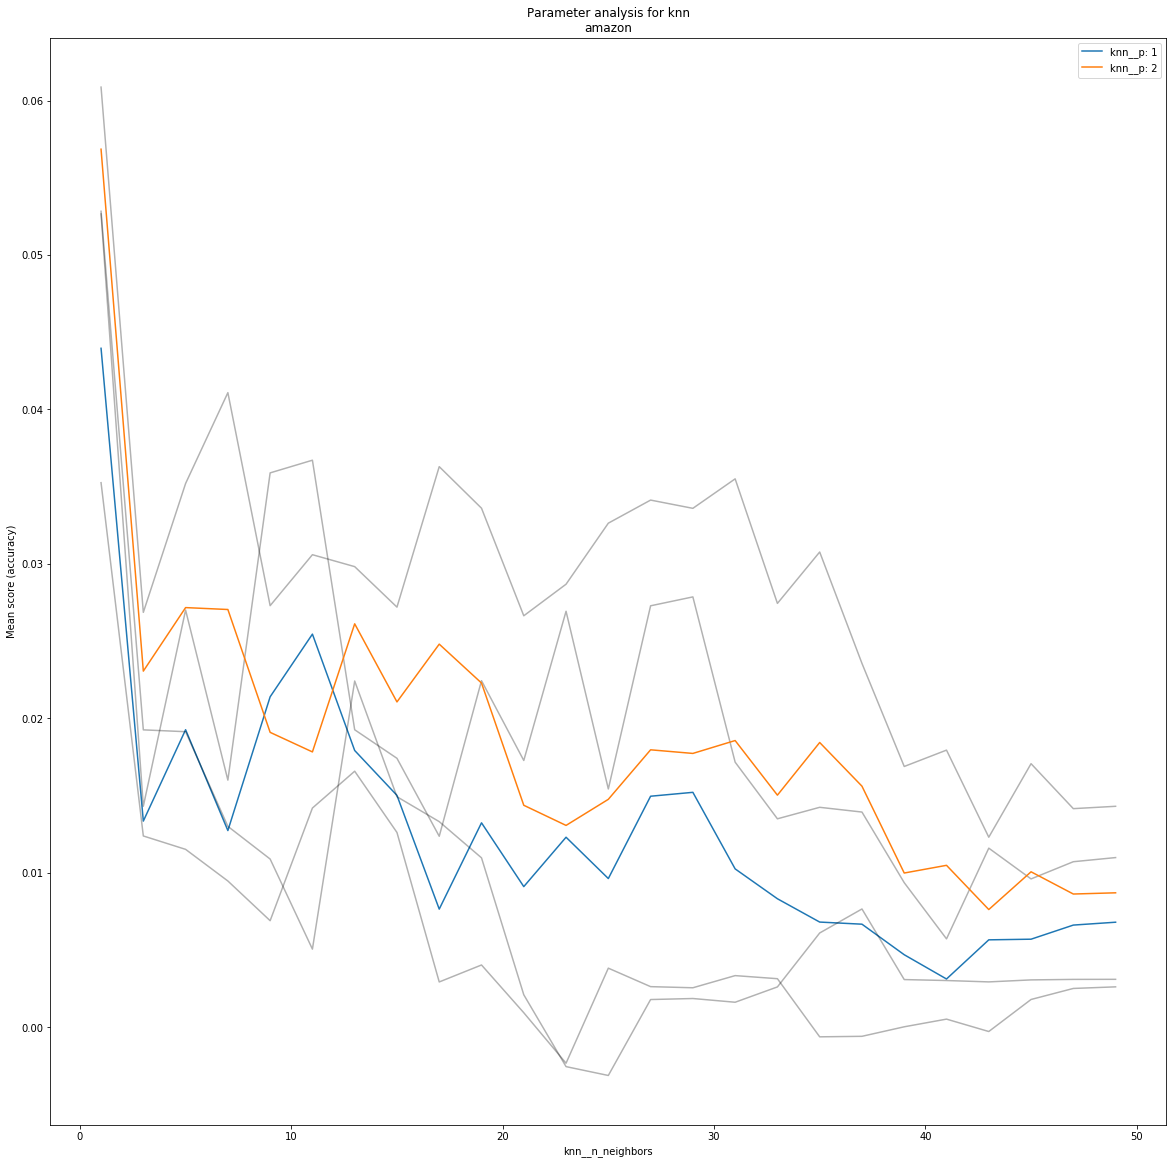

In [37]:
params_knn_base = {
    'knn__weights': ['uniform']
}
plot_parameter_analysis(grid=grid_knn, params=params_knn, param1='knn__n_neighbors', 
                        param2='knn__p', params_base=params_knn_base, 
                        method_name="knn")



## Random Forest
__Score history:__

### Random Forest parameters
- __n_estimators:__
    - number of trees in the forest
- __max_depth:__
    - maximum depth of the tree
- __min_samples_split:__
    - the min. number of samples required to split an internal node
- __min_samples_leaf:__
    - the minimum number of samples required to be at a leaf node
- __min_weight_fraction_leaf:__
    - the minimum weighted fraction of the sum total of weights
- __max_features:__
    - the number of features to consider when looking for the best split
- __min_impurity_decrease:__
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier())
])

In [42]:
params_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10, 20, 21, 22],
    'rf__min_samples_split': [2, 3, 4]
}


In [43]:
grid_rf = GridSearchCV(estimator=pipe_rf,
    param_grid=params_rf,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1)


In [46]:
grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   49.4s finished
C:\Users\rapha\Anaconda3\envs\DatasetDescription\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                       

In [47]:
grid_rf.best_params_

{'rf__max_depth': None, 'rf__min_samples_split': 3, 'rf__n_estimators': 200}

In [48]:
grid_rf.score(X_test, y_test)

C:\Users\rapha\Anaconda3\envs\DatasetDescription\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5790375535865732

In [49]:
y_pred_rf = grid_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf)) 

In [ ]:
print(confusion_matrix(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)

init (2, 6, 3)


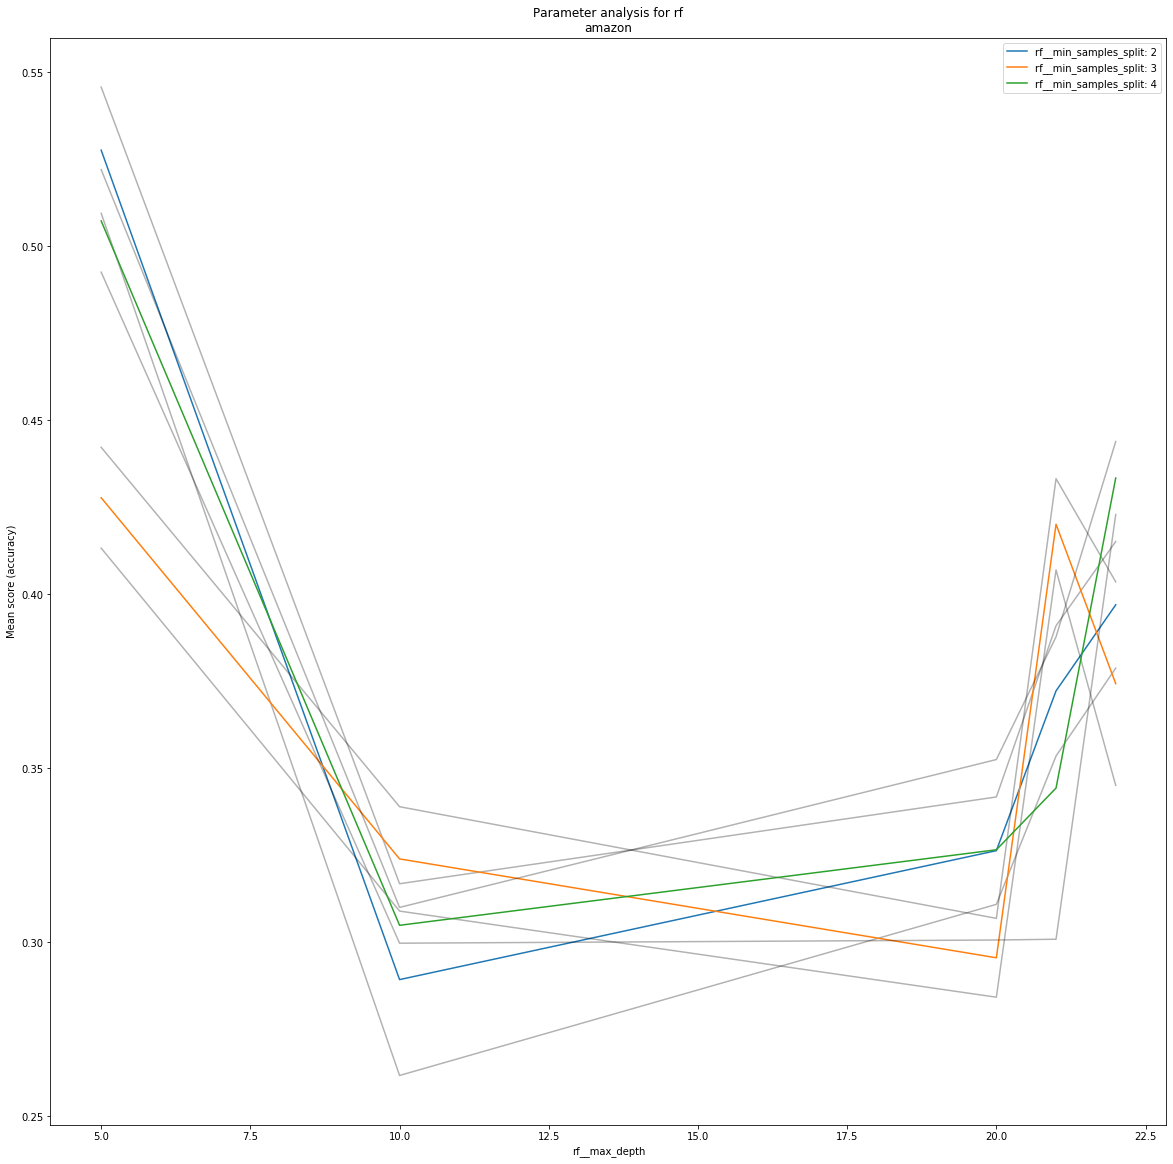

In [51]:
params_rf_base = {
    'rf__max_depth': [None, 5, 10, 15, 20],
    'rf__min_samples_split': [2, 3, 4],
    'rf__n_estimators': [100]
}
plot_parameter_analysis(grid=grid_rf, params=params_rf, param1='rf__max_depth',
                        param2='rf__min_samples_split', params_base=params_rf_base,
                        method_name='rf')

## Creating a GradientBoostingClassifier
__Score history:__

In [54]:
from sklearn.ensemble import GradientBoostingClassifier


In [55]:
pipe_gbc = Pipeline([
    ('gbc', GradientBoostingClassifier())
])

In [56]:
params_gbc = {
    'gbc__n_estimators': [200],
    'gbc__max_depth': [4, 5, 6, 7],
    'gbc__max_features': ['log2'],
    'gbc__learning_rate': [0.05, 0.1, 0.15, 0.3],
    'gbc__subsample': [0.8]
}

In [57]:
grid_gbc = GridSearchCV(estimator=pipe_gbc,
    param_grid=params_gbc,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1
)


In [58]:
grid_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.5min finished
C:\Users\rapha\Anaconda3\envs\DatasetDescription\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('gbc',
                                        GradientBoostingClassifier(criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                                                                   min_samp

In [77]:
grid_gbc.best_params_

{'gbc__learning_rate': 0.05,
 'gbc__max_depth': 5,
 'gbc__max_features': 'log2',
 'gbc__n_estimators': 200,
 'gbc__subsample': 0.8}

In [78]:
grid_gbc.score(X_test, y_test)

C:\Users\rapha\Anaconda3\envs\3_classification\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.1824628282698458

In [79]:
y_pred_gbc = grid_gbc.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred_gbc)) 

              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.00      0.00      0.00         5
           2       0.23      0.60      0.33         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.11      0.20      0.14         5
           9       0.50      1.00      0.67         6
          10       0.00      0.00      0.00         4
          11       0.15      0.33      0.21         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         4
          15       1.00      0.60      0.75         5
          16       0.25      0.40      0.31         5
          17       0.00    

In [82]:
print(confusion_matrix(y_test, y_pred_gbc))
cm = confusion_matrix(y_test, y_pred_gbc)




[[1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


init (1, 4, 1, 4, 1)


ValueError: x and y must have same first dimension, but have shapes (4,) and (0, 4, 0)

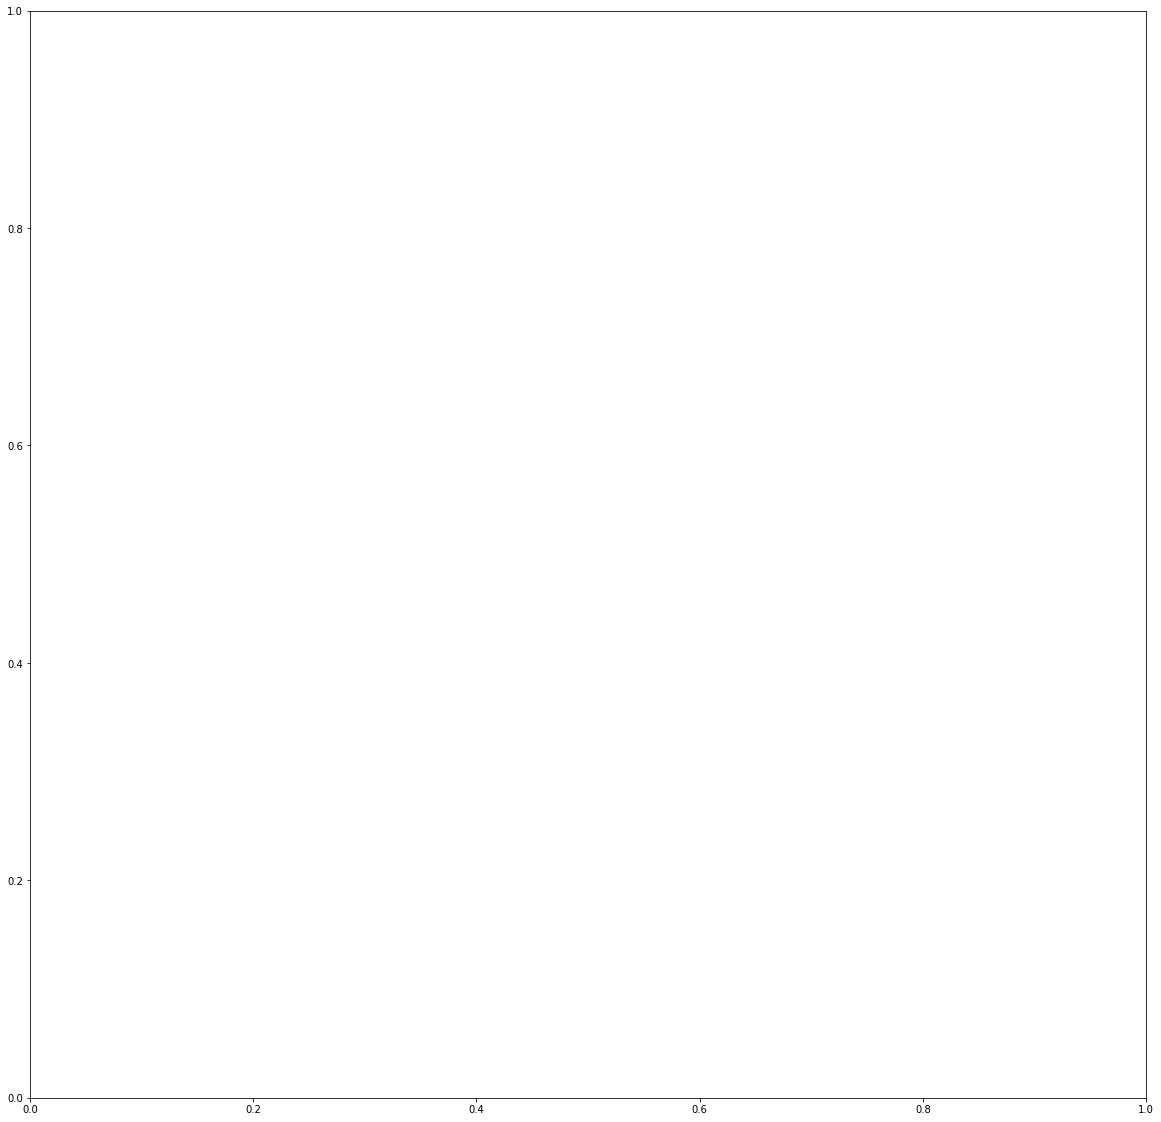

In [65]:
params_gbc_base = {
    'gbc__learning_rate': [0.05, 0.1, 0.15, 0.3],
    'gbc__max_depth': [4, 5, 6, 7],
    'gbc__max_features': ['log2'],
    'gbc__n_estimators': [100],
    'gbc__subsample': [0.8]
}
plot_parameter_analysis(grid=grid_gbc, params=params_gbc, param1='gbc__max_depth',
                        param2='gbc__learning_rate', params_base=params_gbc_base,
                        method_name='gbc')

## Creating MLP-Classifier



In [83]:
from sklearn.neural_network import MLPClassifier

In [89]:
mdl_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', alpha=0.0001, 
						batch_size=20, learning_rate='invscaling', learning_rate_init=0.001, verbose=True)


In [90]:
mdl_mlp.fit(X_train, y_train)

Iteration 1, loss = 4.66029775
Iteration 2, loss = 3.82170619
Iteration 3, loss = 3.52457844
Iteration 4, loss = 3.10559927
Iteration 5, loss = 2.42779156
Iteration 6, loss = 1.76433185
Iteration 7, loss = 1.12818540
Iteration 8, loss = 0.67660549
Iteration 9, loss = 0.34961302
Iteration 10, loss = 0.19817959
Iteration 11, loss = 0.12827695
Iteration 12, loss = 0.08194513
Iteration 13, loss = 0.05595143
Iteration 14, loss = 0.04394356
Iteration 15, loss = 0.03457355
Iteration 16, loss = 0.02791353
Iteration 17, loss = 0.02375397
Iteration 18, loss = 0.02043554
Iteration 19, loss = 0.01783804
Iteration 20, loss = 0.01543666
Iteration 21, loss = 0.01364024
Iteration 22, loss = 0.01214293
Iteration 23, loss = 0.01095939
Iteration 24, loss = 0.00995971
Iteration 25, loss = 0.00891591
Iteration 26, loss = 0.00815973
Iteration 27, loss = 0.00751202
Iteration 28, loss = 0.00694199
Iteration 29, loss = 0.00644585
Iteration 30, loss = 0.00602058
Iteration 31, loss = 0.00561595
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='invscaling',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [91]:
mdl_mlp.score(X_test, y_test)

0.35555555555555557

In [92]:
y_pred_mdl = mdl_mlp.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred_mdl)) 

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.71      1.00      0.83         5
           2       0.31      0.80      0.44         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.40      0.67      0.50         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         5
           9       0.71      0.83      0.77         6
          10       0.75      0.75      0.75         4
          11       0.75      0.50      0.60         6
          12       0.20      0.20      0.20         5
          13       0.67      0.40      0.50         5
          14       0.00      0.00      0.00         4
          15       0.67      0.80      0.73         5
          16       0.20      0.20      0.20         5
          17       0.50    

C:\Users\rapha\Anaconda3\envs\3_classification\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
print(confusion_matrix(y_test, y_pred_mdl))
cm = confusion_matrix(y_test, y_pred_mdl)




[[2 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
